## **6.4: Supervised Machine Learning: Regression**

### **Contents**
1. Importing Libraries for Visualization and Geospatial Analysis
2. Importing Analysis Data
3. Data Cleaning
4. Data Preparation for Regression Analysis
5. Regression Anylsis
6. Summary

### **1. Importing Libraries**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

### **2. Importing Analysis Data**

In [2]:
# Create data path
path = r'/Users/anjanpakhrin/Documents/US Accidents Analysis 2016-2023'

In [3]:
# Importing cleaned DataFrame from previous step
df_accidents = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_6-3.pkl'))

In [4]:
# Checking output
df_accidents.head(2)

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),...,astronomical_twilight,month,month_name,day_of_week,accident_day,accident_hour,time_of_day,severity_label,extreme_flag,year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Ohio,36.900002,0.0,91.0,...,Night,2,February,0,Monday,5,Night,Serious,False,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Ohio,37.900002,0.0,100.0,...,Day,2,February,0,Monday,6,Morning,Moderate,False,2016


### **3. Data Cleaning**

In [5]:
# Checking data shape
df_accidents.shape

(7477440, 29)

**3.1: Check for Missing Values**

In [6]:
# Check for missing values
df_accidents.isnull().sum()

id                       0
source                   0
severity                 0
start_time               0
end_time                 0
distance(mi)             0
state                    0
temperature(f)           0
wind_chill(f)            0
humidity(%)              0
pressure(in)             0
visibility(mi)           0
wind_direction           0
wind_speed(mph)          0
precipitation(in)        0
weather_condition        0
sunrise_sunset           0
civil_twilight           0
nautical_twilight        0
astronomical_twilight    0
month                    0
month_name               0
day_of_week              0
accident_day             0
accident_hour            0
time_of_day              0
severity_label           0
extreme_flag             0
year                     0
dtype: int64

**3.2: Duplicates Check**

In [7]:
# Check Duplicates
dups = df_accidents.duplicated()

In [8]:
# No dups
dups.shape

(7477440,)

> **No Duplicates found**

**3.3: Check for Extreme Values**

**Extreme Value Checke** have been already conducted in the previous exercises. However, **Extremes** can be checked in diiferent ways, such:
- Interquartile Range (IQR) Method
- Using Z-scores (Standard Deviation Method)
- Visualization (boxplots & histograms) Method

A few random checks for **extreme values** with **"VISUALIZATION"** will be conducted for a few selected variables, which are critical to investigate the raod accident frequency in this case.

**- Extremes Value Checks for "temperature (f)"**

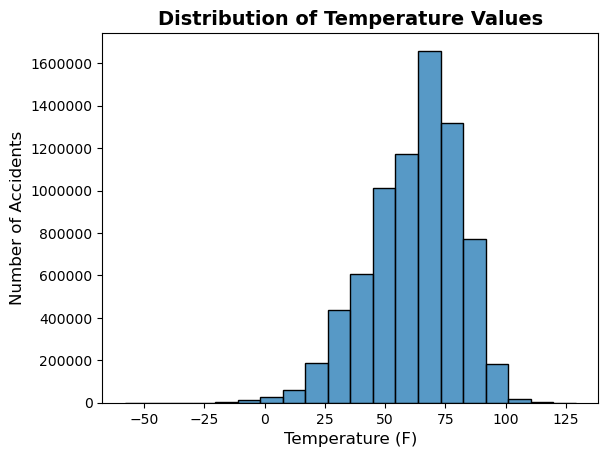

In [9]:
# Visualizing extreme values for 'temperature(f)'
sns.histplot(df_accidents['temperature(f)'], bins=20, kde = False)
plt.title('Distribution of Temperature Values', fontsize = 14, fontweight = 'bold')
plt.xlabel('Temperature (F)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [10]:
# Check the mean, median, max of "Temperature"

print("* Mean of Temperature (F):", round(df_accidents['temperature(f)'].mean(), 2))
print("* Median of Temperature (F):", round(df_accidents['temperature(f)'].median(), 2))
print("* Max of Temperature (F):", round(df_accidents['temperature(f)'].max(), 2))

* Mean of Temperature (F): 62.16
* Median of Temperature (F): 64.0
* Max of Temperature (F): 129.2


**- Extremes Value Checks for "wind_chill (f)"**

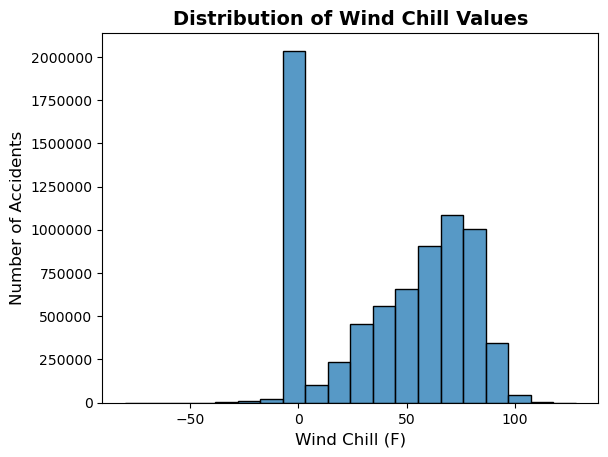

In [11]:
sns.histplot(df_accidents['wind_chill(f)'], bins=20, kde = False)
plt.title('Distribution of Wind Chill Values', fontsize = 14, fontweight = 'bold')
plt.xlabel('Wind Chill (F)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [12]:
# Check the mean, median, max of "Wind Chill"

print("* Mean of Wind Chill (F):", round(df_accidents['wind_chill(f)'].mean(), 2))
print("* Median of Wind Chill (F):", round(df_accidents['wind_chill(f)'].median(), 2))
print("* Max of Wind Chill (F):", round(df_accidents['wind_chill(f)'].max(), 2))

* Mean of Wind Chill (F): 43.18
* Median of Wind Chill (F): 51.0
* Max of Wind Chill (F): 128.0


**- Extremes Value Checks for "humidity (%)"**

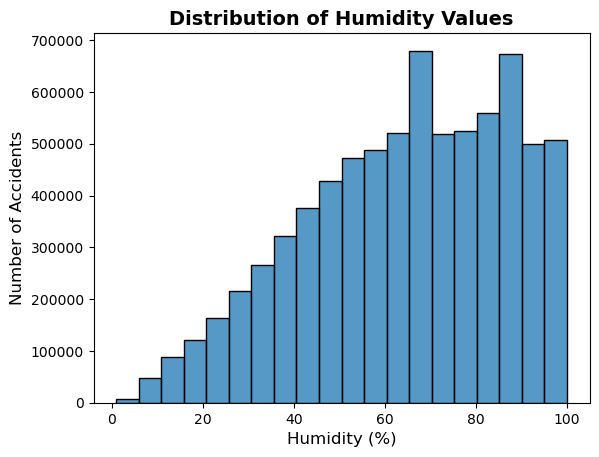

In [13]:
sns.histplot(df_accidents['humidity(%)'], bins=20, kde = False)
plt.title('Distribution of Humidity Values', fontsize = 14, fontweight = 'bold')
plt.xlabel('Humidity (%)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

> **No Outliers** found for humidity, since the values lie between 0 and 100%.

In [14]:
# Check the mean, median, max of "Humidity"

print("* Mean of Humidity (%):", round(df_accidents['humidity(%)'].mean(), 2))
print("* Median of Humidity (%):", round(df_accidents['humidity(%)'].median(), 2))
print("* Max of Humidity (%):", round(df_accidents['humidity(%)'].max(), 2))

* Mean of Humidity (%): 64.78
* Median of Humidity (%): 67.0
* Max of Humidity (%): 100.0


**- Extremes Value Checks for "visibility (mi)"**

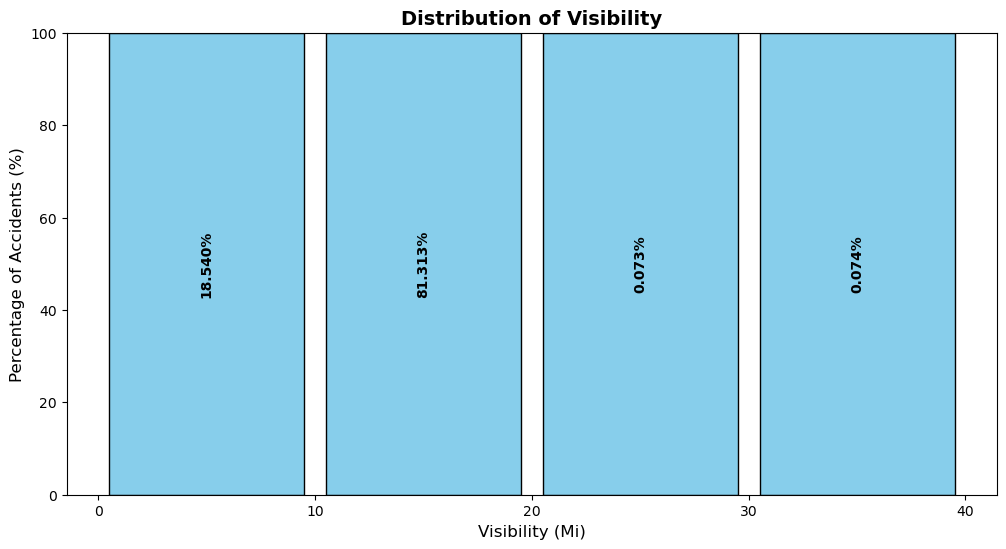

In [15]:
# Histogram for visibility
from matplotlib.ticker import MultipleLocator

# Define bin edges (bin width 20)
min_vis = df_accidents['visibility(mi)'].min()
max_vis = df_accidents['visibility(mi)'].max()
bins = np.arange(min_vis, max_vis + 10, 10)

# Compute histogram
counts, bin_edges = np.histogram(df_accidents['visibility(mi)'], bins=bins)
percentages = counts / counts.sum() * 100

# Normalize counts to full height (100%)
normalized_heights = np.ones_like(counts) * 100  # full height bars

# Plot histogram with all bars full height
plt.figure(figsize=(12,6))
bars = plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # bin centers
    normalized_heights,
    width=(bin_edges[1] - bin_edges[0]) * 0.9,
    color="skyblue",
    edgecolor="black"
)

# Add percentage text inside each bar (rotated 90°)
for bar, pct in zip(bars, percentages):
    if pct > 0:
        plt.text(
            bar.get_x() + bar.get_width()/2,
            50,                # middle of full-height bar
            f"{pct:.3f}%",
            ha="center",
            va="center",
            rotation=90,
            fontsize=10,
            fontweight="bold",
            color="black"
        )

# Titles & labels
plt.title("Distribution of Visibility", fontsize=14, fontweight="bold")
plt.xlabel("Visibility (Mi)", fontsize=12)
plt.ylabel("Percentage of Accidents (%)", fontsize=12)

# X-axis ticks every 10
plt.gca().xaxis.set_major_locator(MultipleLocator(10))

# Y-axis 0-100%
plt.ylim(0, 100)

plt.show()

In [16]:
# Check the mean, median, max of "Visibility (mi)"

print("* Mean of Visibility (Mi):", round(df_accidents['visibility(mi)'].mean(), 2))
print("* Median of Visibility (Mi):", round(df_accidents['visibility(mi)'].median(), 2))
print("* Max of Visibility (Mi):", round(df_accidents['visibility(mi)'].max(), 2))

* Mean of Visibility (Mi): 9.11
* Median of Visibility (Mi): 10.0
* Max of Visibility (Mi): 40.0


**- Extremes Value Checks for "wind speed (mph)"**

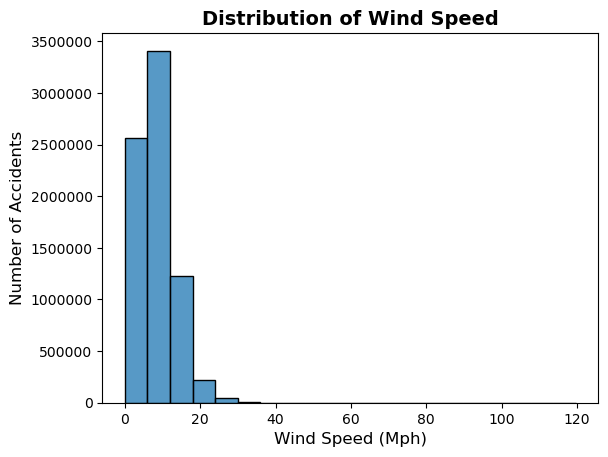

In [17]:
# Histogram for wind speed
sns.histplot(df_accidents['wind_speed(mph)'], bins=20, kde = False)
plt.title('Distribution of Wind Speed', fontsize = 14, fontweight = 'bold')
plt.xlabel('Wind Speed (Mph)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [18]:
# Check the mean, median, max of "Wind Speed (mph)"

print("* Mean of Wind Speed (Mph):", round(df_accidents['wind_speed(mph)'].mean(), 2))
print("* Median of Wind Speed (Mph):", round(df_accidents['wind_speed(mph)'].median(), 2))
print("* Max of Wind Speed (Mph):", round(df_accidents['wind_speed(mph)'].max(), 2))

* Mean of Wind Speed (Mph): 7.62
* Median of Wind Speed (Mph): 7.0
* Max of Wind Speed (Mph): 119.7


**- Extremes Value Checks for "precipitation (in)"**

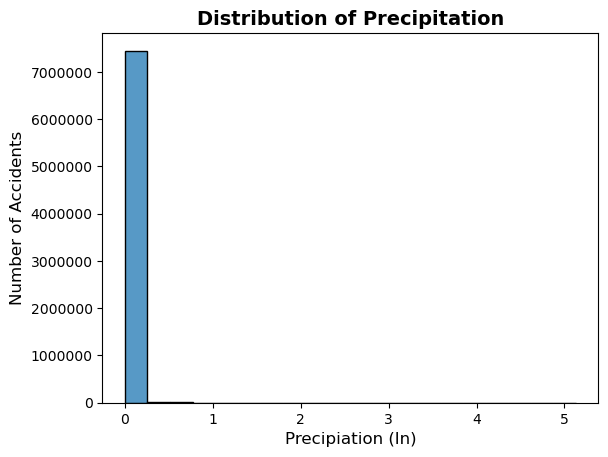

In [19]:
# Histogram for precipitation(in)
sns.histplot(df_accidents['precipitation(in)'], bins=20, kde = False)
plt.title('Distribution of Precipitation', fontsize = 14, fontweight = 'bold')
plt.xlabel('Precipiation (In)', fontsize = 12)
plt.ylabel('Number of Accidents', fontsize = 12)

# Plotting y-axis value in normal number format
plt.ticklabel_format(style='plain', axis='y')

# Show histogram
plt.show()

In [20]:
# Check the mean, median, max of "Precipitation (in)"

print("* Mean of Precipitation (in):", round(df_accidents['precipitation(in)'].mean(), 2))
print("* Median of Precipitation (in):", round(df_accidents['precipitation(in)'].median(), 2))
print("* Max of Precipitation (in):", round(df_accidents['precipitation(in)'].max(), 2))

* Mean of Precipitation (in): 0.01
* Median of Precipitation (in): 0.0
* Max of Precipitation (in): 5.13


> **Outcomes of above conducted tests are based on the cleaned data in previous steps under following conditions:**
> - Temperatur (°F): −60 - 130 (Covers extreme Alaska lows to Death Valley high)
> - Wind Chill (°F): -80 - 130
> - Visibility (mi): 0 - 40 (0: No visibility (dense fog, blizzard), 10: Clear, > 40: Not meaningful (sky is clear)).
> - Wind Speed (mph): 0 - 120 (0: Calm, 60 - 100: Strong (Huricanes, Tornados, >120: Unlikely Outliers)
> - Precipitation (in): 0 - 6 (2 - 3: Heavy rainfall, 6: Unrealistic) --> inches/hour)

### 4. Data Preparation for Regression Analysis

In [21]:
# Check basic descriptive stats
df_accidents.describe()

,severity,start_time,end_time,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),month,day_of_week,accident_hour,year
count,7.477440e+06,7477440,7477440,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06,7.477440e+06
mean,2.217383e+00,2020-05-03 10:30:10.550670080,2020-05-03 18:05:05.406967040,5.502621e-01,6.215557e+01,4.317581e+01,6.477541e+01,2.955597e+01,9.108811e+00,7.623274e+00,5.294464e-03,6.879121e+00,2.589605e+00,1.232464e+01,2.019807e+03
min,1.000000e+00,2016-01-14 20:18:33,2016-02-08 06:37:08,0.000000e+00,-5.800000e+01,-8.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03
25%,2.000000e+00,2018-11-02 07:43:20.750000128,2018-11-02 08:32:44.750000128,0.000000e+00,5.000000e+01,0.000000e+00,4.900000e+01,2.940000e+01,1.000000e+01,5.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,8.000000e+00,2.018000e+03
50%,2.000000e+00,2020-10-20 14:49:00.500000,2020-10-20 19:53:39,2.000000e-02,6.400000e+01,5.100000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,1.300000e+01,2.020000e+03
75%,2.000000e+00,2021-12-13 07:23:47.249999872,2021-12-13 17:20:00,4.440000e-01,7.600000e+01,7.200000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.000000e+01,0.000000e+00,1.000000e+01,4.000000e+00,1.700000e+01,2.021000e+03
max,4.000000e+00,2022-12-31 23:59:03,2023-03-31 23:59:00,4.417500e+02,1.292000e+02,1.280000e+02,1.000000e+02,5.863000e+01,4.000000e+01,1.197000e+02,5.130000e+00,1.200000e+01,6.000000e+00,2.300000e+01,2.022000e+03
std,4.908915e-01,NaN,NaN,1.740815e+00,1.865803e+01,3.217795e+01,2.254175e+01,1.787278e+00,2.544325e+00,5.006503e+00,4.079930e-02,3.570041e+00,1.802322e+00,5.460166e+00,1.860330e+00


#### **Hypothesis to test:** The number of traffic accidents increases as daily average humidity rises.

**4.1: Select Variables**

In [22]:
# Aggregate accident counts by day

accident_daily = df_accidents.groupby(df_accidents['start_time'].dt.date).agg({
    'humidity(%)': 'mean',
    'id': 'count'     # Count number of accidents
}).rename(columns={'id': 'accident_count'}).reset_index()

In [23]:
# Select and reshape variables to for analysis based on hypothesis
# Independet Variables
X = accident_daily['humidity(%)'].values.reshape (-1, 1)

# Dependent Variables
y = accident_daily['accident_count'].values.reshape(-1, 1)

In [24]:
X

array([[69.      ],
       [91.816666],
       [87.118645],
       ...,
       [68.99947 ],
       [75.91075 ],
       [88.68509 ]], shape=(2499, 1), dtype=float32)

In [25]:
y

array([[   7],
       [  60],
       [  59],
       ...,
       [5684],
       [6555],
       [5808]], shape=(2499, 1))

**4.2: Split Data**

In [26]:
# Split data into training and test set
# Test dataset = 30%
# Train dataset = 70%'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5: Regression Analysis

In [27]:
# Create a regression object

regression = LinearRegression() # Regression object to be fitted onto the training set

In [28]:
# Fit the regression object onto training set

regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

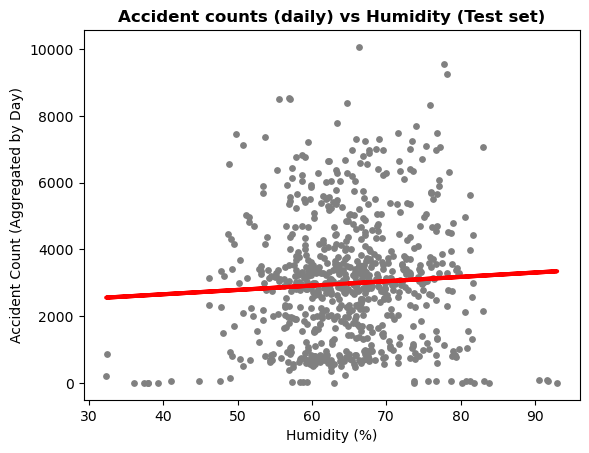

In [30]:
# Create plot to show the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Accident counts (daily) vs Humidity (Test set)', fontsize=12, fontweight='bold')
plot_test.xlabel('Humidity (%)')
plot_test.ylabel('Accident Count (Aggregated by Day)')
plot_test.show()

> **Interpretation:**
> * **Poor Fit:** The flat trend line indicates a very weak relationship between humidity and accident counts.
> * **High Variability:** Data points are widely scattered, showing accident counts vary greatly at similar humidity levels.
> * **No Clear Pattern:** No consistent increase or decrease in accidents with changing humidity.
> * **Limited Predictive Power:** Humidity alone is not a meaningful predictor of daily accident frequency.

In [31]:
# Create objects containing the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)   # Mean Squared Error
r2 = r2_score(y_test, y_predicted)               # R2 score. 

In [32]:
# Display model summary statistics

print('Slope:' ,regression.coef_)
print('Mean Squared Error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.008582]]
Mean Squared Error:  3498237.5
R2 score:  0.0045011043548583984


> **Slope (coefficient): Indicates how y changes with X: 13.01**
>  This means that for every 1% increase in humidity, the model predicts roughly 13 additional accidents on average. The positive slope aligns with hypothesis that accident counts rise with increasing humidity.

> **MSE (Mean Squared Error: 3,498,237.5): Measures how far the predicted values are from actual values.** AA large value indicates that the model’s predictions are often far from the actual counts. Given the scale of accident counts (likely in thousands), the error is high, suggesting the model doesn’t fit the data well.

> **R² (R-squared: 0.0045 ≈ 0.45%): Shows how much variance in y is explained by the model.** This indicates that humidity explains only 0.45% of the variation in accident counts. Essentially, humidity alone has almost no predictive power for accident counts in your dataset.

In [33]:
# Dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,678,2921.117188
1,6439,2882.944092
2,4188,2936.561768
3,3293,2923.414062
4,784,2966.111328
5,1904,2992.492432
6,1559,3189.451172
7,3145,2903.703125
8,6046,2992.018066
9,712,2918.948730


**Comparing how the Regression fits Training Set**

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse2 = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean Squared Error: ', rmse2)
print('R2 score: ', r2)

Slope: [[13.008582]]
Mean Squared Error:  3433177.25
R2 score:  0.0028830766677856445


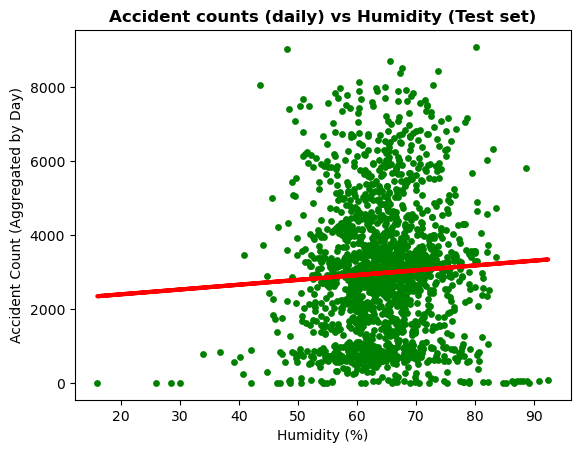

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Accident counts (daily) vs Humidity (Test set)', fontsize=12, fontweight='bold')
plot_test.xlabel('Humidity (%)')
plot_test.ylabel('Accident Count (Aggregated by Day)')
plot_test.show()

> **Model Performance:** The linear regression using humidity to predict accident counts performs poorly. Predicted values often deviate substantially from actual counts, reflected in a very low R² (0.0028) and high MSE.
> * Humidity alone explains almost none of the variation in accidents.
> * Other factors like time of day, traffic volume, weather type, and location likely have stronger influence.
> * Data biases (e.g., regional differences, seasonal effects) may impact model accuracy.

>**Conclusion:** A univariate model with humidity is insufficient.